<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

!pip install LazyPredict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.ensemble import (
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.linear_model import (
    LogisticRegression, PassiveAggressiveClassifier, Perceptron,
    RidgeClassifier, RidgeClassifierCV, SGDClassifier
)
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.style.use('ggplot')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 14.8 MB/s eta 0:00:00


In [6]:
df= pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [8]:
df['Time'].describe()

,Time
count,284807.00
mean,94813.86
std,47488.15
min,0.00
25%,54201.50
50%,84692.00
75%,139320.50
max,172792.00


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [12]:
import plotly.express as px
fig = px.pie(data_frame = df,names = 'Class',title = 'Distribution of Classes',)

In [13]:
fig.show()

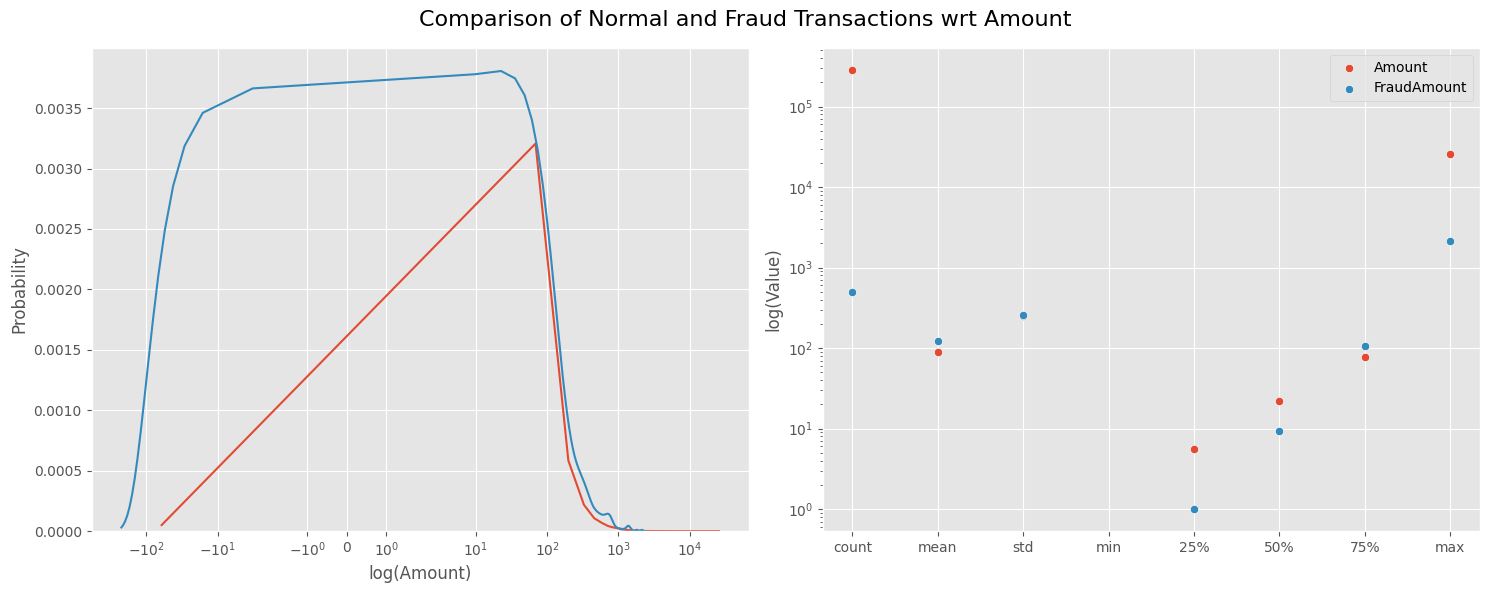

In [14]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
fig.suptitle('Comparison of Normal and Fraud Transactions wrt Amount', fontsize=16)


sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Amount',ax = ax[0])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='FraudAmount',ax = ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(df[df['Class'] == 0]['Amount'].describe(), label='Amount',ax = ax[1])
sns.scatterplot(df[df['Class'] == 1]['Amount'].describe(), label='FraudAmount',ax = ax[1])
ax[1].set_yscale('log')
ax[1].set_xlabel('')
ax[1].set_ylabel('log(Value)')
plt.tight_layout()
plt.show()

- Note: for low amount transactions , the probability of fraud is more than a regular transaction , but most of the transactions are normal so it is not a good idea to draw any conclusion incase of imbalanced dataset.

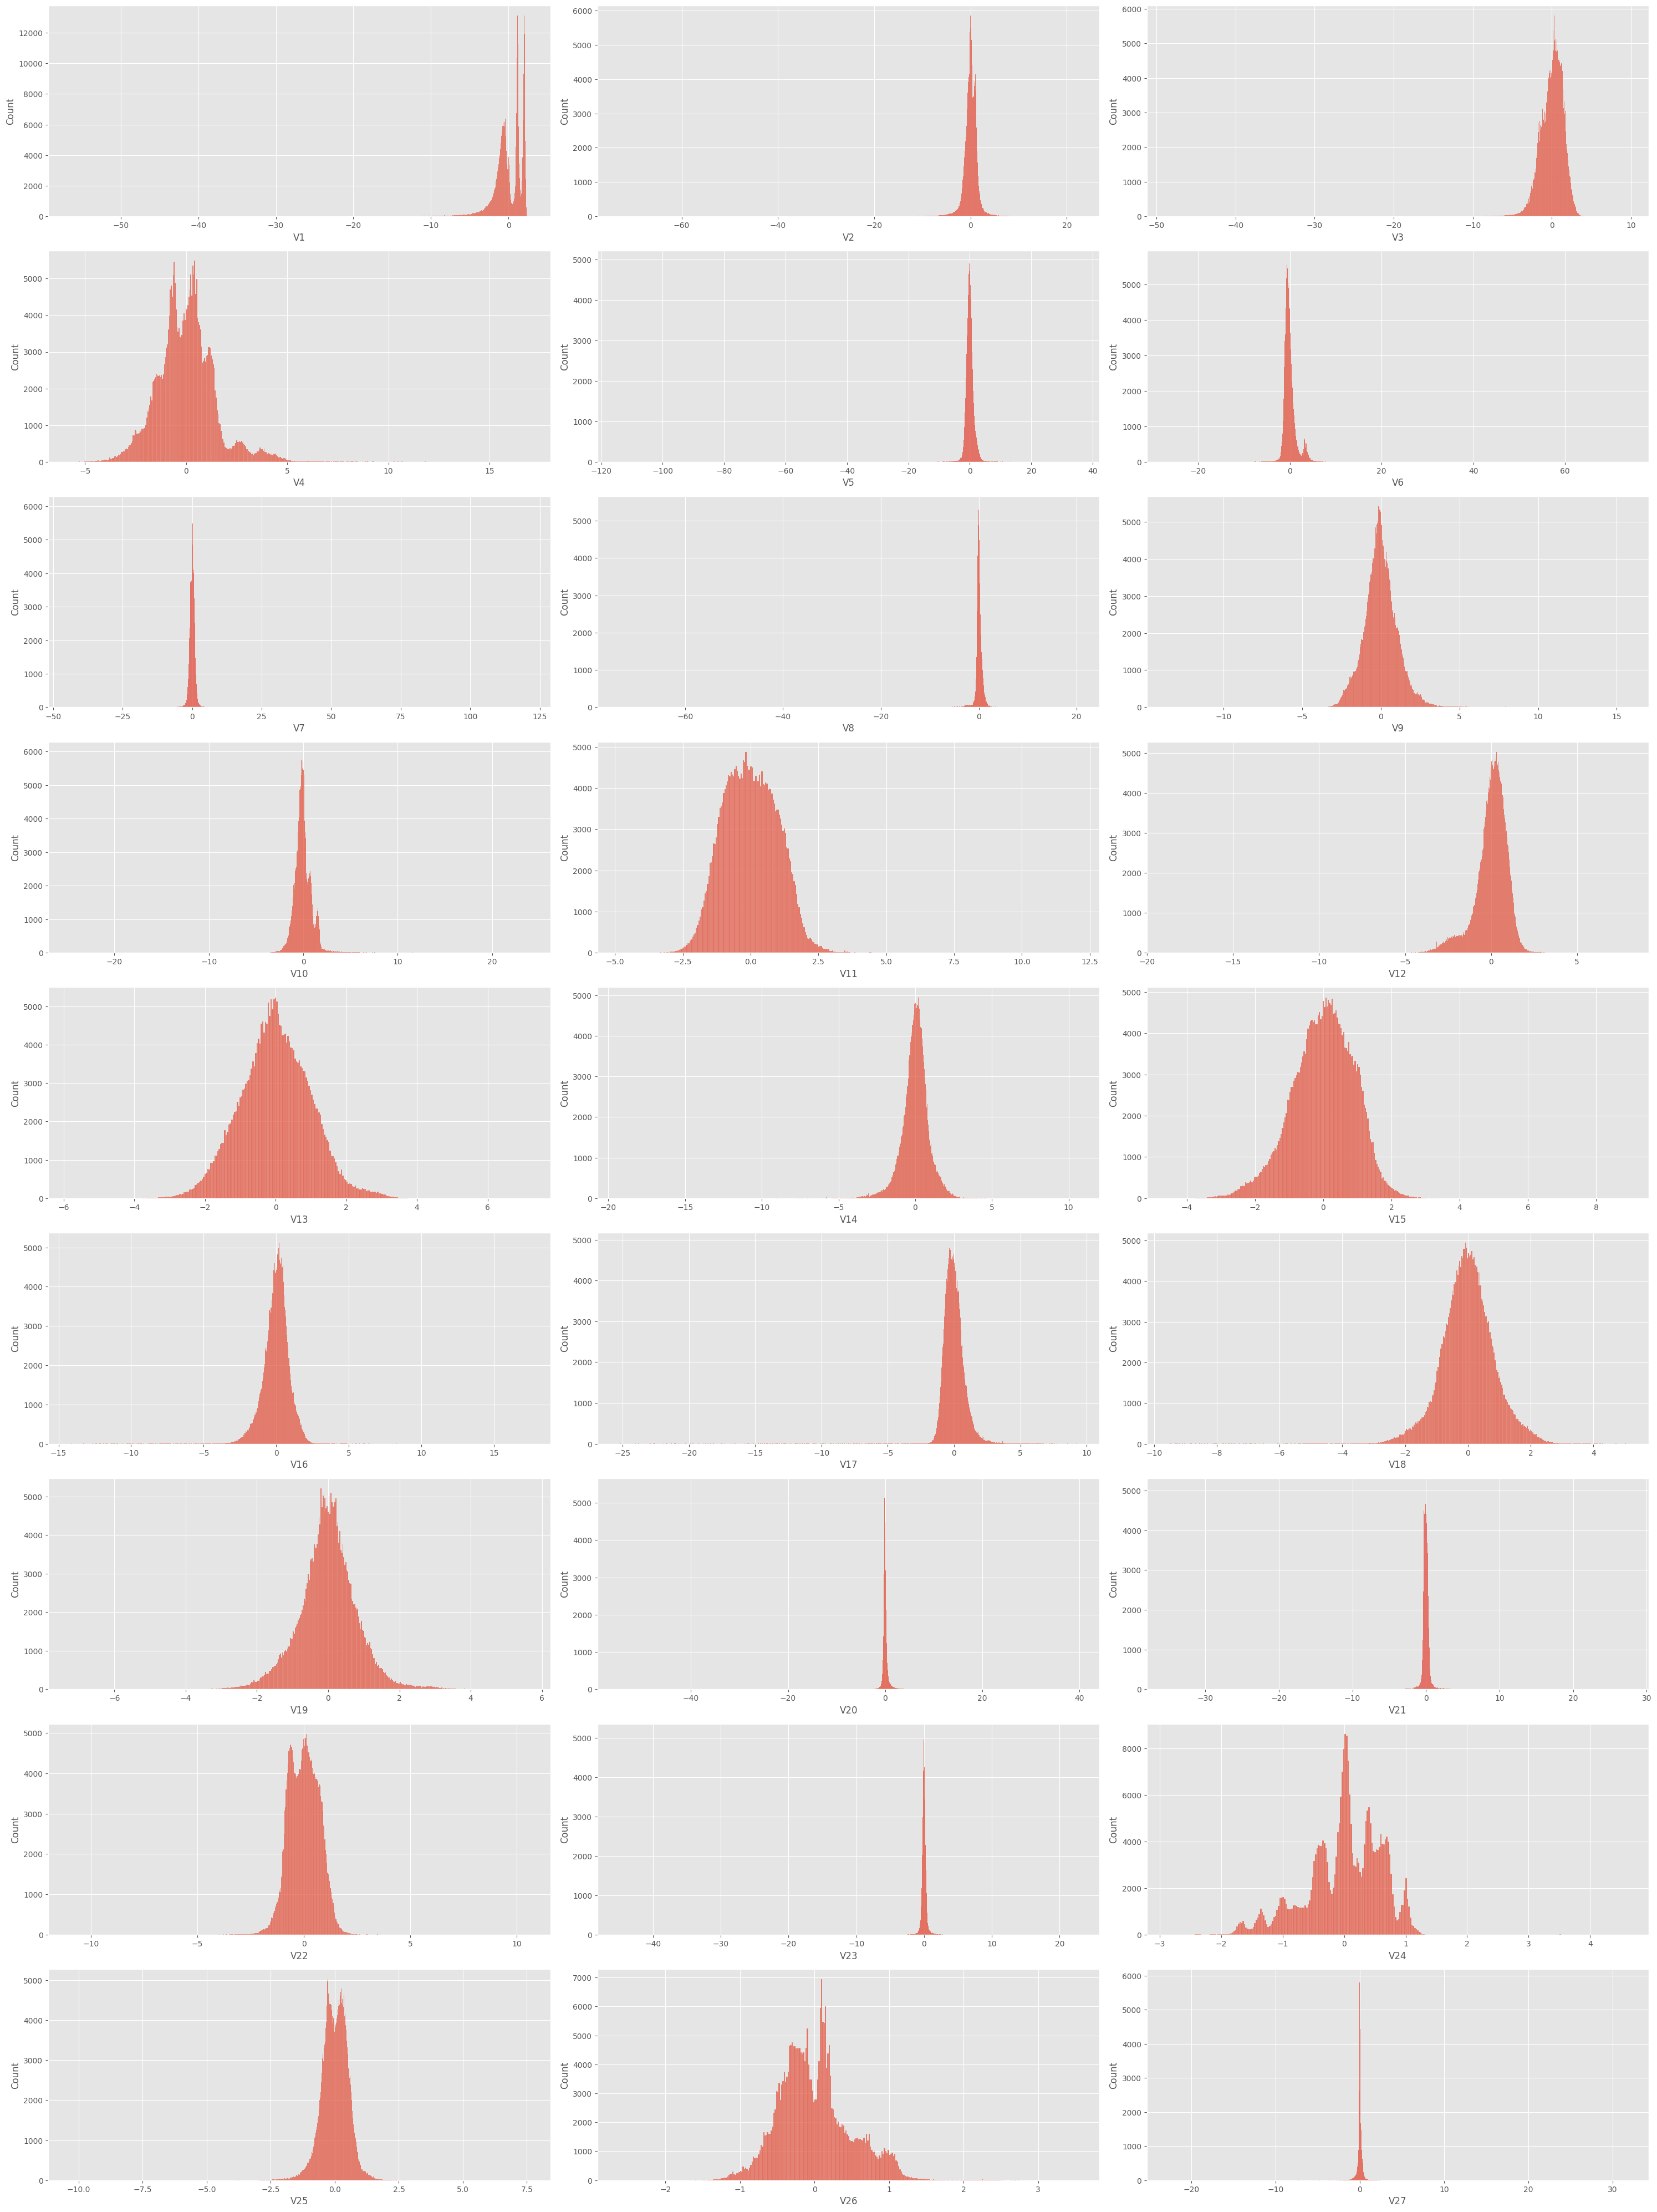

In [15]:
fig,ax = plt.subplots(9,3,figsize=(30,40))
ax = ax.flatten()
for i,column in enumerate(df.columns[1:28]):

    sns.histplot(data = df, x = df[column],ax = ax[i])
plt.tight_layout()
plt.show()

Feature Selection using correlation

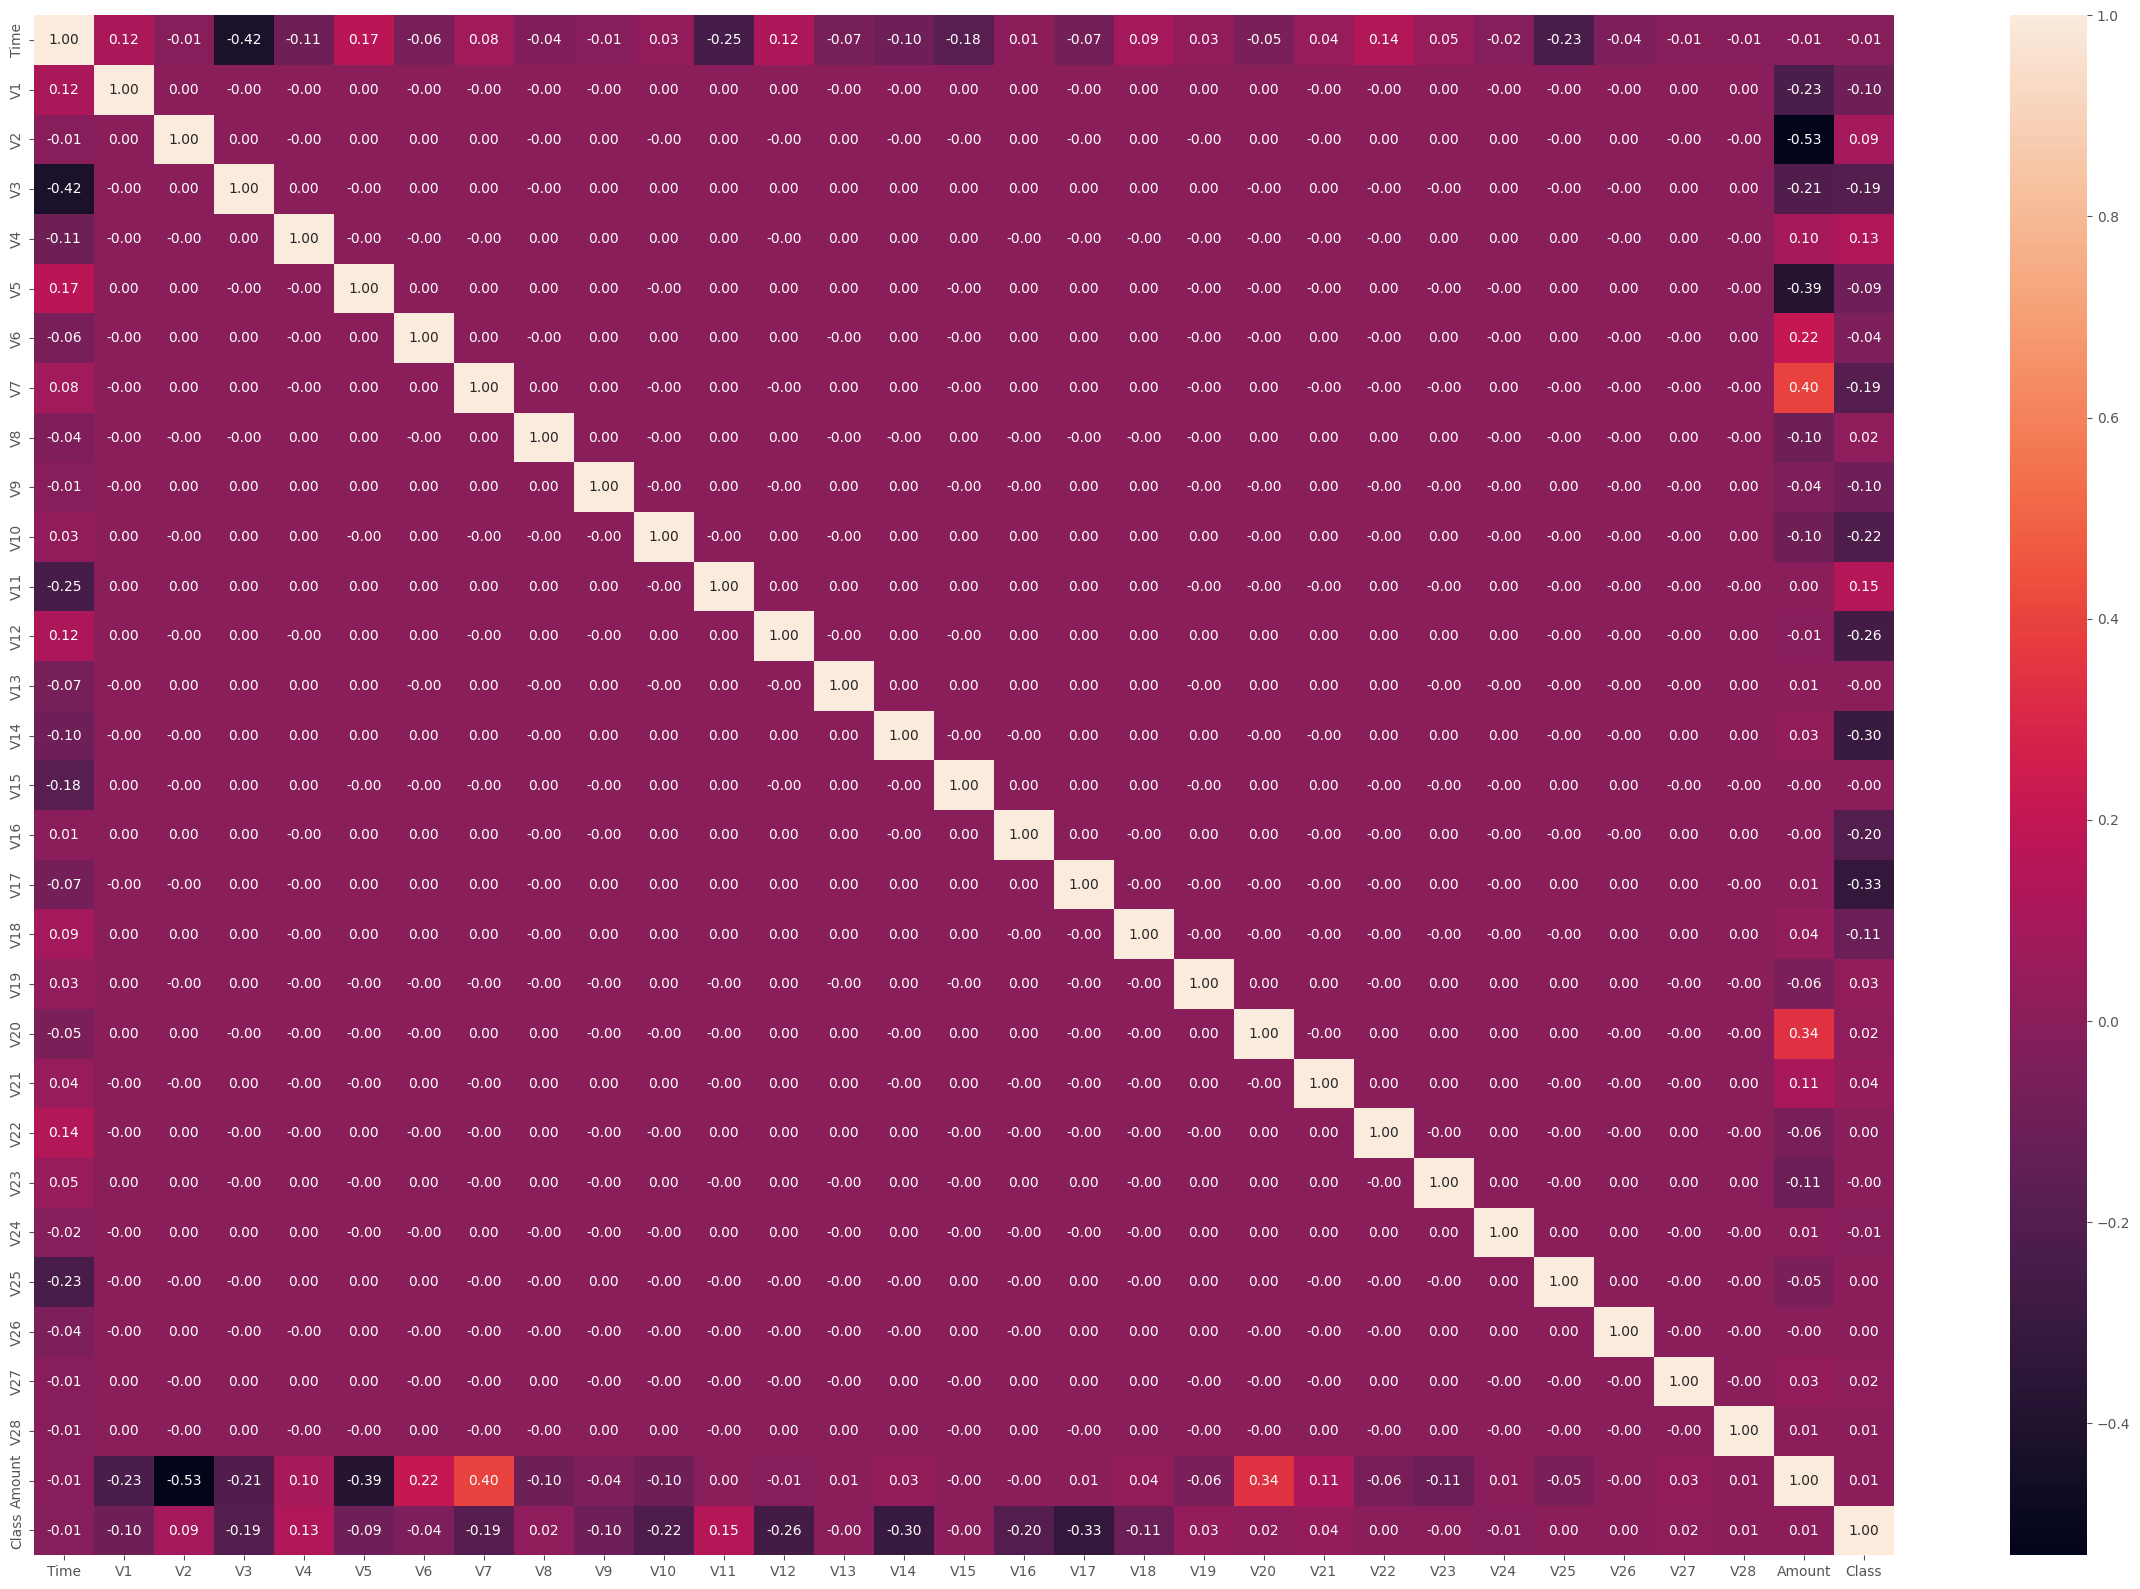

In [16]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cbar = 'coolwarm', annot = True, fmt = "0.2f")

# dropping the columns having correlation less than 0.10.
# i will try whole data set and selected columns both one by one during model building.

for corr,column in zip(df.corr().iloc[30],df.columns):
    if abs(corr)<0.13:
        df.drop(columns = column , inplace = True)

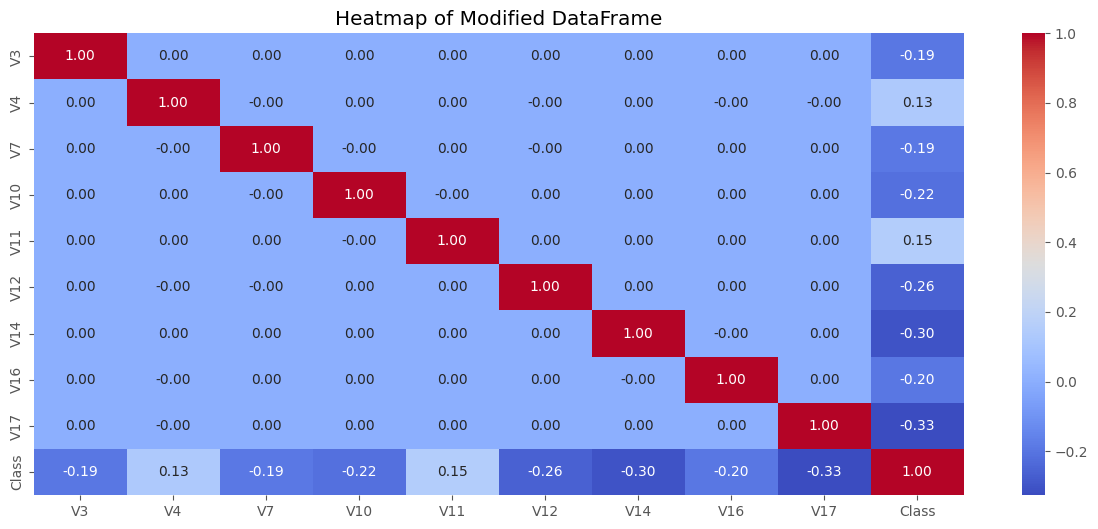

In [17]:
plt.figure(figsize=(15,6))
plt.title('Heatmap of Modified DataFrame')
sns.heatmap(df.corr(),cmap='coolwarm',fmt='0.2f',annot = True)
plt.show()

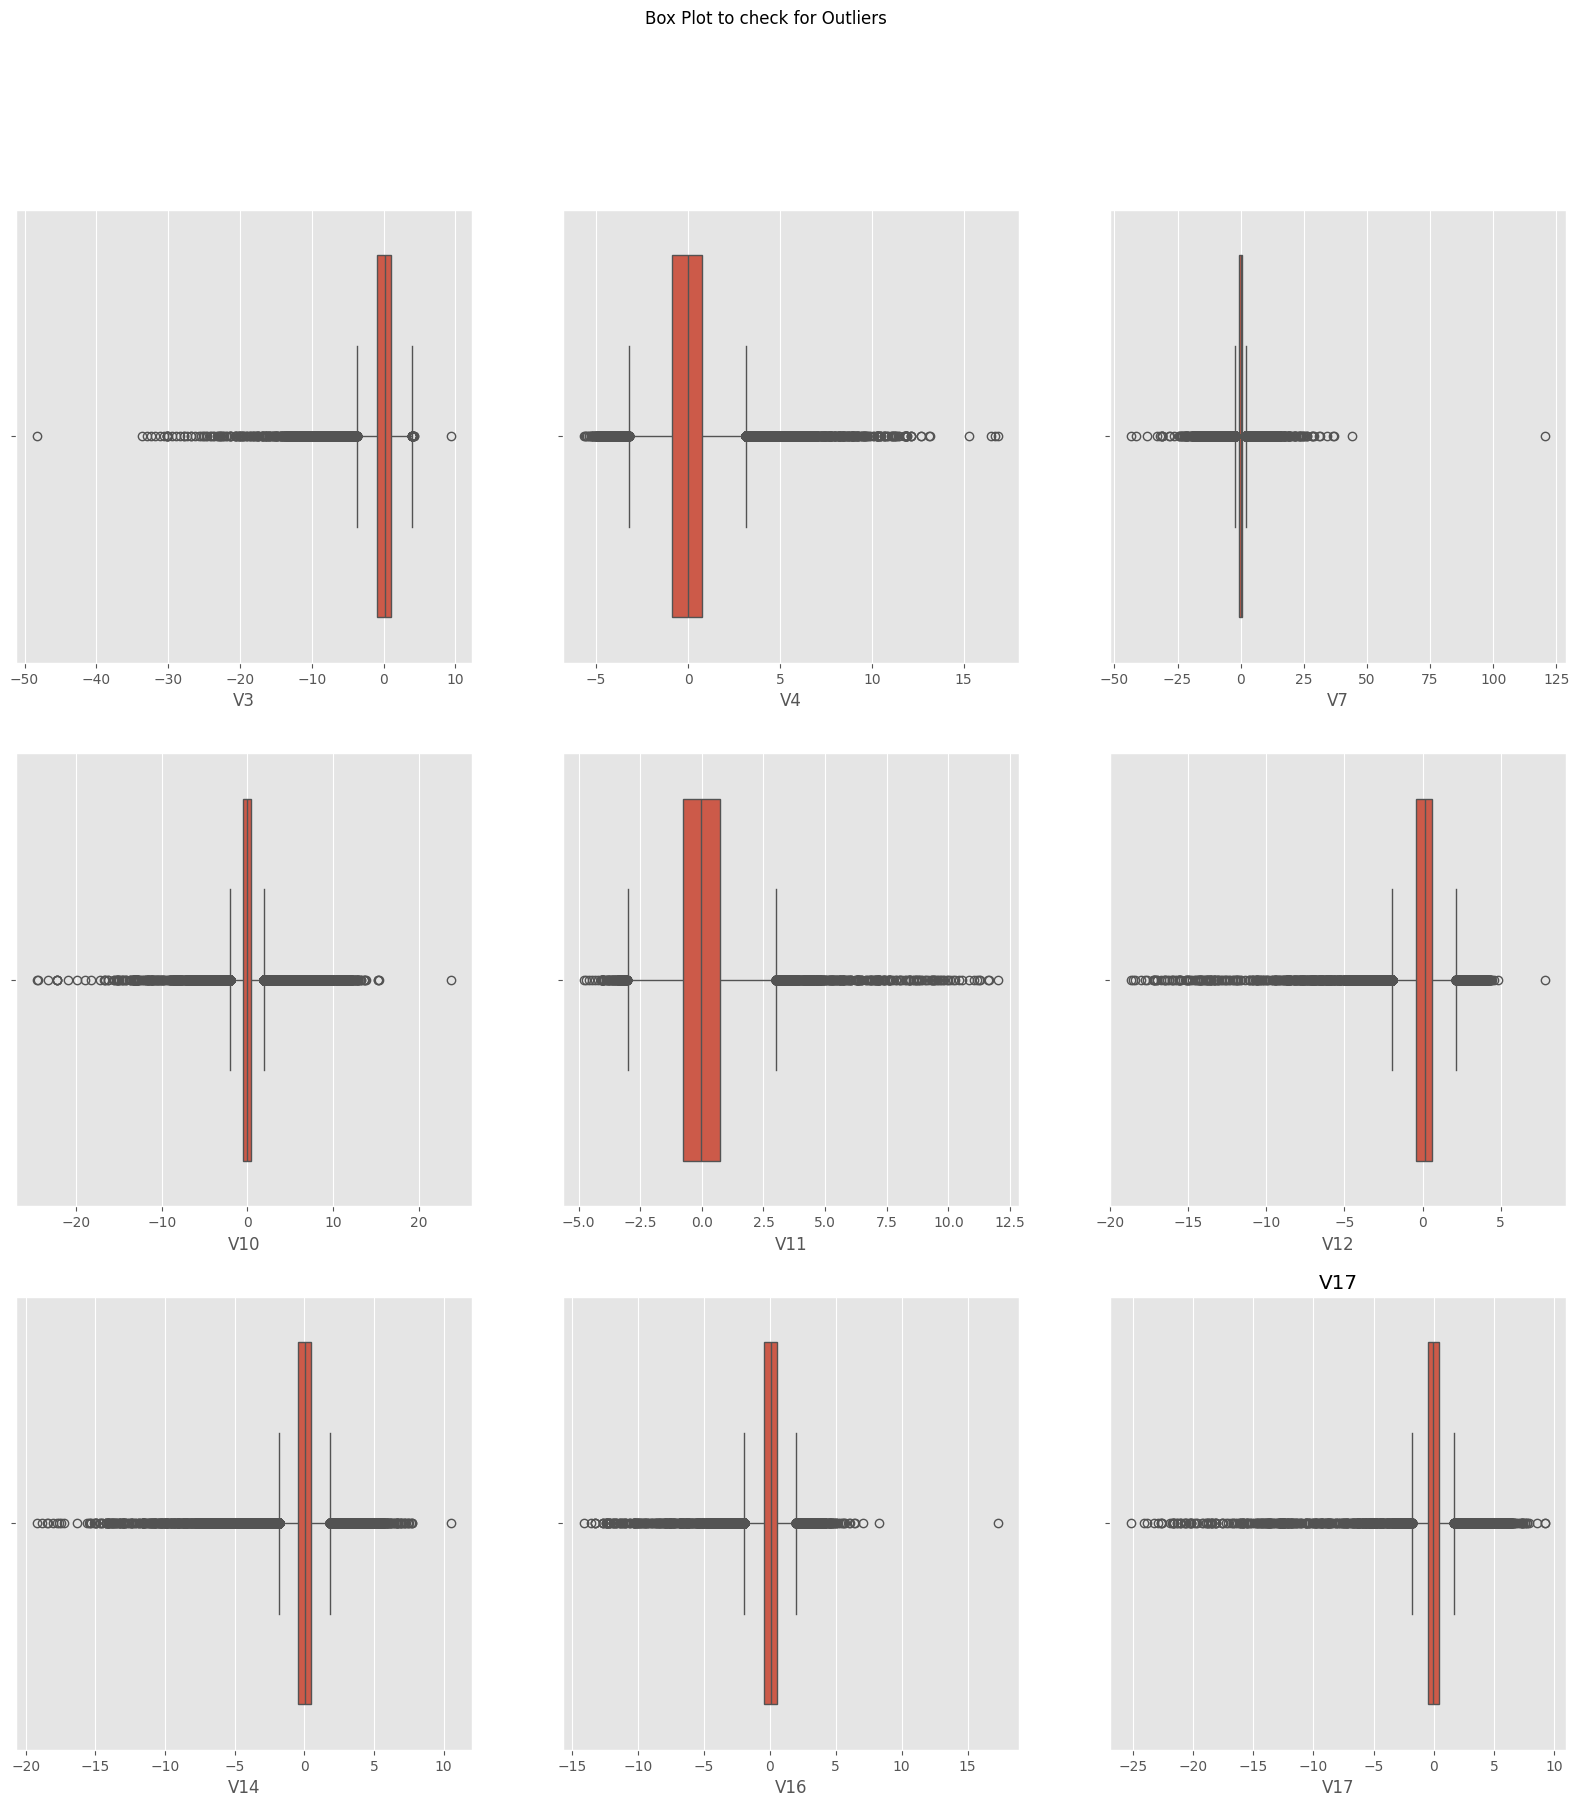

In [18]:
fig,ax = plt.subplots(3,3,figsize=(20,20))
ax = ax.flatten()
plt.suptitle('Box Plot to check for Outliers')
for i,column in enumerate(df.columns):
    if i ==9:
        continue
    sns.boxplot(data = df , x = column, ax = ax[i])
    plt.title(column)

In [19]:
# splitting the data to apply different techniques of handling imbalance data on training set .(To prevent Data leakage i am not using whole Dataset)
X = df.drop(columns = ['Class'])
y = df['Class']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print(f' shape of X_train is {X_train.shape}, shape of X_test is {X_test.shape}, shape of y_train is {y_train.shape}, shape of y_test is {y_test.shape}')

 shape of X_train is (227845, 9), shape of X_test is (56962, 9), shape of y_train is (227845,), shape of y_test is (56962,)


DownSampling
# honestly i checked different Sampling Techniques (undersampling, oversampling, combination of both (SMOTEENN) but UnderSampling is best approach for this data)
# problem with Oversampling - Class - 1 Data is very less therefore synthetically generated Data isnot the representation of the actual Data .  generating
# more than 800,000 samples from 492 samples is probably a huge mistake.
# therefore i have used RandomUnderSampler for undersampling .

In [20]:
rus = RandomUnderSampler(random_state = 7)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(f' shape of X_res_rus is {X_res.shape}, shape of y_res_rus is {y_res.shape}')
print(f'Distribution of y_res_rus: {Counter(y_res)}')

 shape of X_res_rus is (788, 9), shape of y_res_rus is (788,)
Distribution of y_res_rus: Counter({0: 394, 1: 394})


In [21]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_res, X_test, y_res, y_test)

# lazyPredict used weighted f1_Score , which is misleading in case of imbalanced Data
# f1 = f1_score(y_test, y_pred, average='weighted') ---> i pasted this from there original Code.

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [22]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.97,0.95,0.95,0.98,0.06
SVC,0.99,0.95,0.95,0.99,0.60
LogisticRegression,0.98,0.95,0.95,0.99,0.06
CalibratedClassifierCV,0.99,0.95,0.95,0.99,0.27
ExtraTreesClassifier,0.97,0.95,0.95,0.99,0.90
LabelSpreading,0.97,0.94,0.94,0.98,1.10
KNeighborsClassifier,0.98,0.94,0.94,0.99,1.08
LabelPropagation,0.97,0.94,0.94,0.98,1.85
LinearSVC,0.97,0.94,0.94,0.99,0.05


In [23]:
#  I have Listed all models for easier access

models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "LGBMClassifier": LGBMClassifier(),
    "LinearSVC": LinearSVC(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SGDClassifier": SGDClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Perceptron": Perceptron(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "SVC": SVC(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "NuSVC": NuSVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "NearestCentroid": NearestCentroid(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "DummyClassifier": DummyClassifier()
}

results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score Weighted": [],
    "F1 Score Macro": [],
    "Precision_weighted": [],
    "Recall_weighted": [],
    "Precision_macro_avg": [],
    "Recall_macro_avg": []

}


for model_name, model in models.items():

    model.fit(X_res, y_res)

    y_pred = model.predict(X_test)

    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["F1 Score Weighted"].append(f1_score(y_test, y_pred, average='weighted'))
    results["F1 Score Macro"].append(f1_score(y_test, y_pred, average='macro'))
    results["Precision_weighted"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall_weighted"].append(recall_score(y_test, y_pred, average='weighted'))
    results["Precision_macro_avg"].append(precision_score(y_test, y_pred, average='macro'))
    results["Recall_macro_avg"].append(recall_score(y_test, y_pred, average='macro'))


results_df = pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [24]:
results_df

,Model,Accuracy,F1 Score Weighted,F1 Score Macro,Precision_weighted,Recall_weighted,Precision_macro_avg,Recall_macro_avg
0,ExtraTreesClassifier,0.98,0.99,0.55,1.00,0.98,0.53,0.95
1,LabelPropagation,0.94,0.97,0.51,1.00,0.94,0.51,0.91
2,LabelSpreading,0.94,0.97,0.51,1.00,0.94,0.51,0.91
3,LGBMClassifier,0.95,0.97,0.52,1.00,0.95,0.52,0.93
4,LinearSVC,0.97,0.98,0.55,1.00,0.97,0.53,0.95
5,CalibratedClassifierCV,1.00,1.00,0.75,1.00,1.00,0.68,0.94
6,RandomForestClassifier,0.96,0.98,0.53,1.00,0.96,0.52,0.94
7,SGDClassifier,0.90,0.95,0.49,1.00,0.90,0.51,0.92
8,LogisticRegression,0.97,0.98,0.54,1.00,0.97,0.52,0.95
9,KNeighborsClassifier,0.98,0.99,0.56,1.00,0.98,0.53,0.94


Final Model
Model Choice Depends on the requirements , thats why i have listed the metrics for all the Models Above , For this Notebook I will use the Model with highest F1 Score(i.e.NearestCentroid).

In [25]:
FinalModel = NearestCentroid()
FinalModel.fit(X_res, y_res)
pred = FinalModel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



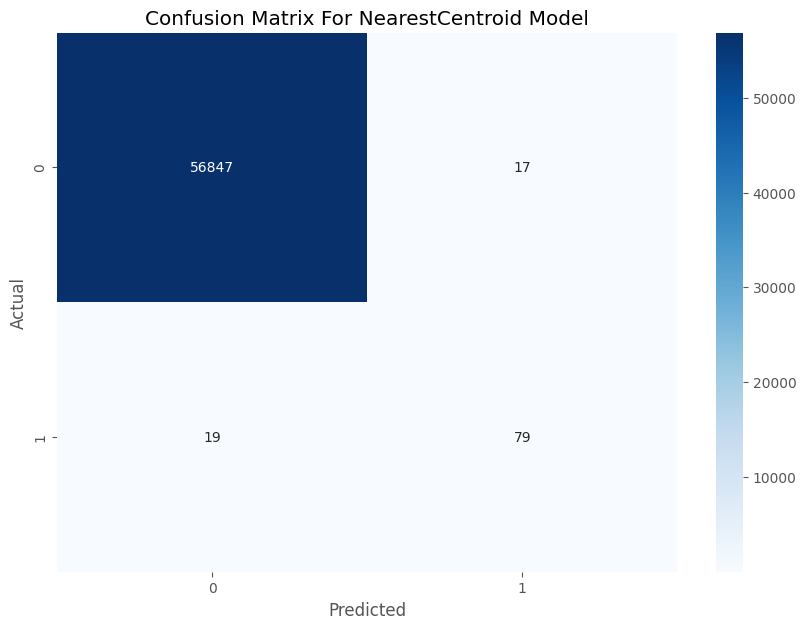

In [26]:
conf_matrix = confusion_matrix(y_test, pred)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For NearestCentroid Model')
plt.show()

 Trying ANN
.
Neural Network Model

In [27]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,BatchNormalization,Dropout
from keras import Sequential

Model = Sequential()
Model.add(Dense(9,activation = 'relu',input_dim = 9))
Model.add(Dense(16,activation = 'relu'))
Model.add(Dropout(0.2))
Model.add(Dense(16,activation = 'relu'))
Model.add(Dropout(0.2))
Model.add(Dense(1,activation = 'sigmoid'))

Model.compile(loss = 'binary_crossentropy',weighted_metrics=['f1_score','recall','precision'])

history = Model.fit(X_res,y_res,epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - f1_score: 0.6521 - loss: 0.5554 - precision: 0.5193 - recall: 0.9451
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6620 - loss: 0.4756 - precision: 0.6014 - recall: 0.9463
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.6512 - loss: 0.4427 - precision: 0.6741 - recall: 0.9442
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6603 - loss: 0.3996 - precision: 0.7673 - recall: 0.9414
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6917 - loss: 0.3407 - precision: 0.8574 - recall: 0.9312
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.6735 - loss: 0.3188 - precision: 0.9160 - recall: 0.9433
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.6811 - loss: 0.3019 - precision: 0.9310 - recall: 0.9055
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.6387 - loss: 0.2897 - precision: 0.9197 - recall: 0.9135
Epoch 9/100
25/25 ━━━━━━

Threshold value can be changed for Precision-Recall Trade-off

In [28]:
threshold = 0.99999
pred_n = np.where(Model.predict(X_test)>threshold,1,0)
print(classification_report(y_test,pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



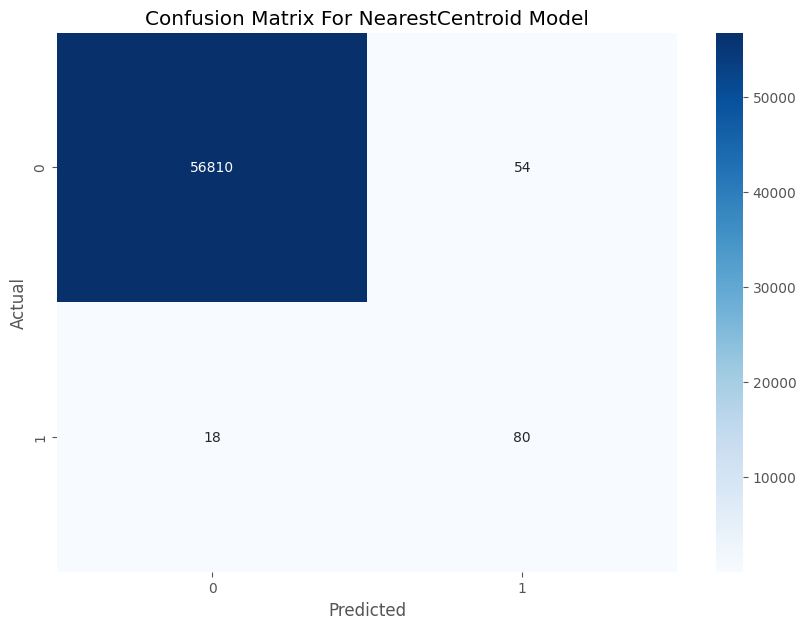

In [29]:
conf_matrix = confusion_matrix(y_test, pred_n)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For NearestCentroid Model')
plt.show()